keras 패키지를 활용한 인공신경망 구현 실습

In [ ]:
import tensorflow as tf          #딥러닝 패키지
import numpy as np               #배열계산 패키지
import matplotlib.pyplot as plt  #시각화 패키지

1. MNIST Data 불러오기

In [ ]:
# 전체 6만개 데이터 중, 5만개는 학습 데이터용, 1만개는 테스트 데이터용으로 분리
# image size는 28x28의 grayscale 2차원 데이터

from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

11501568/11490434 [==============================] - 0s 0us/step
train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


In [ ]:
# train_images[0]

2. MNIST Data 시각화

Text(0.5, 1.0, '5')

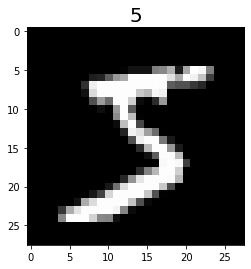

In [ ]:
# 2차월 배열을 흰색과 검은색으로 표현하여 시각화할 수 있음

plt.imshow(train_images[0], cmap='gray')
plt.title(train_labels[0], size=20)

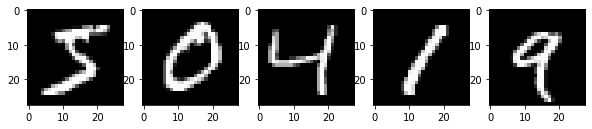

In [ ]:
# 여러개의 그림을 한번에 표현하기

ncols = 5

figure, axs = plt.subplots(figsize=(10, 5), nrows=1, ncols=ncols) # subplots함수는 여러개의 그림을 한번에 표현하도록 도와줌

for i in range(ncols):
    axs[i].imshow(train_images[:5][i], cmap='gray')

3. MNIST 데이터 전처리 수행

In [ ]:
# MNIST 데이터의 0~255 픽셀 값을 0에서 1 사이값으로 scale하고, 데이터 타입을 float32로 변경해준다.

# Keras 패키지에서는 입력데이터가 float 이어야 하기 때문.
# 또한, 일반적으로 딥러닝은 input 값에 대하여 스케일리 해주어야 한다.

# 이미지 값 변환
train_images = np.array(train_images/255.0, dtype=np.float32)  #train_x/255.0 이렇게 해도 돼 -> 이런거 떄문에 데이터의 모양과 형태를 알아야한다 + 형변환도 하니깐 np.array로 하는게 좋을 듯
test_images = np.array(test_images/255.0, dtype=np.float32) 

# 라벨 값 변환
train_labels = np.array(train_labels, dtype=np.float32)
test_labels = np.array(test_labels, dtype=np.float32)

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [ ]:
# 라벨값을 원핫인코딩(One-Hot-Encoding) 해주어야 함

from tensorflow.keras.utils import to_categorical

train_labels_2 = to_categorical(train_labels)
test_labels_2 = to_categorical(test_labels)

print(train_labels_2.shape, test_labels_2.shape)

(60000, 10) (10000, 10)


In [ ]:
# 학습데이터를 학습데이터와 검증데이터로 분리
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(train_images, train_labels_2, test_size=0.3, random_state=1) # 로드데이터는 xyxy인데 여기서는 xxyy네

train_x.shape, val_x.shape, train_y.shape, val_y.shape # 항상 딥러닝은 shape이 진짜 중요하다

((42000, 28, 28), (18000, 28, 28), (42000, 10), (18000, 10))

4. 인공신경망 모델의 구조 설계

In [ ]:
from tensorflow.keras.layers import Dense      # 완전연결층 => 가장 기본적인 딥러닝 층
from tensorflow.keras.layers import Flatten    # 평탄화층   => ANN 구조에 맞게 변환하기 위한 층
from tensorflow.keras.models import Sequential # Keras 패키지의 Model 생성 함수

In [ ]:
model = Sequential()
model.add(Flatten(input_shape = ([28, 28]))) #MNIST 이미지 구조를 평탄화 : (28 * 28) -> (784)
model.add(Dense(20, activation = 'relu'))    #첫번째 은닉층 노드의 수를 20개로 설정, 활성화함수는 relu 사용
model.add(Dense(20, activation = 'relu'))    #두번째 은닉층 노드의 수를 20개로 설정, 활성화함수는 relu 사용
model.add(Dense(10, activation = 'softmax')) #출력층 노드의 수는 Y의 카테고리 수와 맞추어준다 !

5. 인공신경망 모델의 손실함수(Loss)와 최적화함수(Optimizer) 설정

In [ ]:
# 최적화함수는 Adam
# 손실함수는 CategoricalCrossentropy #이진분류인 경우에는 BinaryCrossentropy를 사용하여야 함
# 정확도 계산 방식은 Accuracy를 사용 # Accuracy외에도 precision, F1_score 등 설정 가능

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import Accuracy

In [ ]:
# ANN 모델에 손실함수와 최적화함수를 설정하는 방법은 comile 함수를 이용하면 된다.

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 20)                15700     
                                                                 
 dense_10 (Dense)            (None, 20)                420       
                                                                 
 dense_11 (Dense)            (None, 10)                210       
                                                                 
Total params: 16,330
Trainable params: 16,330
Non-trainable params: 0
_________________________________________________________________


6. 인공신경망 모델 학습 수행

In [ ]:
epochs = 5
batch_size = 32 #주로 2의 배수로 선정함

history = model.fit(x=train_x, y=train_y, batch_size=batch_size, validation_data=(val_x, val_y), 
                    epochs=epochs, verbose=1)

Epoch 1/5
1313/1313 [==============================] - 5s 4ms/step - loss: 0.0667 - accuracy: 0.9792 - val_loss: 0.1780 - val_accuracy: 0.9549
Epoch 2/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0643 - accuracy: 0.9790 - val_loss: 0.1896 - val_accuracy: 0.9521
Epoch 3/5
1313/1313 [==============================] - 3s 3ms/step - loss: 0.0604 - accuracy: 0.9813 - val_loss: 0.1761 - val_accuracy: 0.9566
Epoch 4/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0591 - accuracy: 0.9817 - val_loss: 0.1859 - val_accuracy: 0.9532
Epoch 5/5
1313/1313 [==============================] - 4s 3ms/step - loss: 0.0593 - accuracy: 0.9804 - val_loss: 0.1862 - val_accuracy: 0.9536


In [ ]:
# print(history.history['loss'])
# print(history.history['accuracy'])
# print(history.history['val_loss'])
# print(history.history['val_accuracy'])

7. 평가 데이터를 통한 예측 및 결과확인

In [ ]:
# 테스트 데이터 세트로 모델 성능 검증
# 딥러닝에서는 accuracy를 계산하는데 model.evaluate를 model.score 대신 사용함
# 첫번째 결과값은 loss, 두번째 결과값은 accuracy를 의미함

model.evaluate(test_images, test_labels_2, verbose=0)

[0.17548607289791107, 0.9564999938011169]

In [ ]:
#예측한 값과 실제값 눈으로 비교

pred_y=model.predict(test_images).argmax(axis=1) # 테스트 라벨 2로 학습하고 비교는 원핫 안한 테스트 라벨 1과 하니 이렇게 나온다
print(pred_y[:10])
print(test_labels[:10])

[7 2 1 0 4 1 4 9 6 9]
[7. 2. 1. 0. 4. 1. 4. 9. 5. 9.]


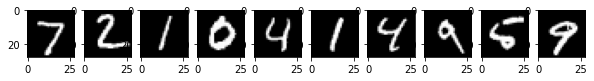

In [ ]:
# 여러개의 그림을 한번에 표현하기

ncols = 10

figure, axs = plt.subplots(figsize=(10, 10), nrows=1, ncols=ncols) # subplots함수는 여러개의 그림을 한번에 표현하도록 도와줌

for i in range(ncols):
    axs[i].imshow(test_images[:10][i], cmap='gray')

8. 새로운 데이터를 가지고 다시 풀어보기

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print("train dataset shape:", train_images.shape, train_labels.shape)
print("test dataset shape:", test_images.shape, test_labels.shape)

train dataset shape: (60000, 28, 28) (60000,)
test dataset shape: (10000, 28, 28) (10000,)


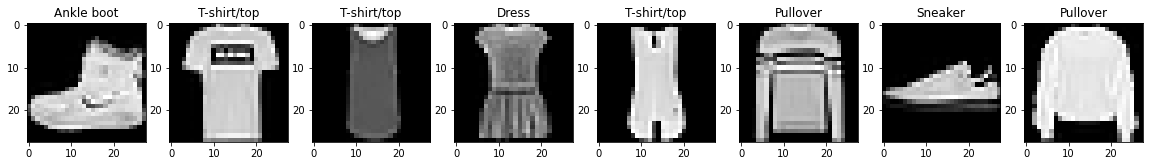

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

ncols = 8

figure, axs = plt.subplots(figsize=(20, 8), nrows=1, ncols=ncols) # subplots함수는 여러개의 그림을 한번에 표현하도록 도와줌

for i in range(ncols):
    axs[i].imshow(train_images[:8][i], cmap='gray')
    axs[i].set_title(class_names[train_labels[:8][i]])